In [3]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.3 MB/s eta 0:00:00


In [31]:
from deepface import DeepFace
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [28]:
import os

db_path = "face_db"
if not os.path.exists(db_path):
    os.makedirs(db_path)
    print(f"Created database directory: {db_path}")
else:
    print(f"Database directory already exists: {db_path}")

Database directory already exists: face_db


In [32]:
img1=cv2.imread('MESSI.jpg')
img2=cv2.imread('Ronaldo.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [29]:
import os

db_path = "face_db"
identities = ["MESSI", "Ronaldo"] # Add the names of the people you want to identify

for identity in identities:
    identity_path = os.path.join(db_path, identity)
    if not os.path.exists(identity_path):
        os.makedirs(identity_path)
        print(f"Created directory for {identity}: {identity_path}")
    else:
        print(f"Directory for {identity} already exists: {identity_path}")

Directory for MESSI already exists: face_db/MESSI
Directory for Ronaldo already exists: face_db/Ronaldo


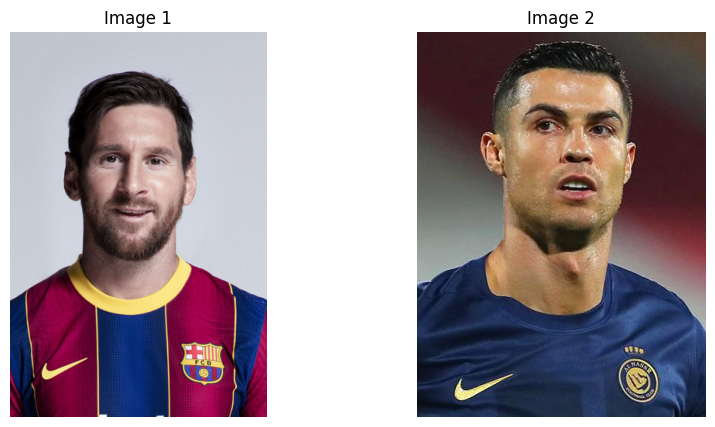

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title("Image 2")
plt.axis('off')

plt.show()

Verification Result: {'verified': False, 'distance': 0.955075, 'threshold': 0.68, 'confidence': 0.69, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 79, 'y': 101, 'w': 163, 'h': 163, 'left_eye': (186, 166), 'right_eye': (130, 164)}, 'img2': {'x': 99, 'y': 35, 'w': 213, 'h': 213, 'left_eye': (235, 127), 'right_eye': (168, 121)}}, 'time': 0.35}


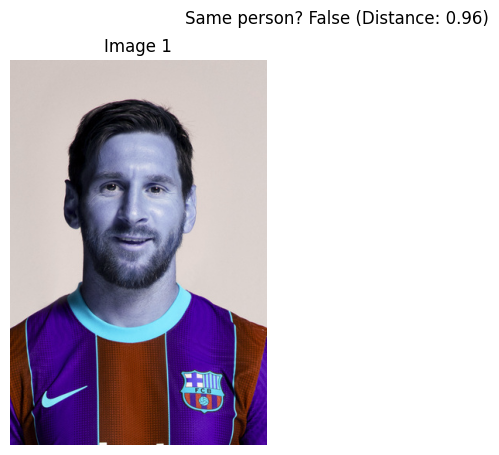

In [34]:
result = DeepFace.verify(img1_rgb, img2_rgb)
print("Verification Result:", result)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_rgb, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis('off')

plt.suptitle(f"Same person? {result['verified']} (Distance: {result['distance']:.2f})")
plt.show()

# Face Verification

# Analyze age, gender, and emotion of a face

In [35]:
img1=cv2.imread('MESSI.jpg')
#img1=cv2.imread('Ronaldo.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

Action: emotion: 100%|██████████| 3/3 [00:00<00:00, 51.98it/s]



Analysis Results:
Age: 26
Gender: Man
Emotion: neutral


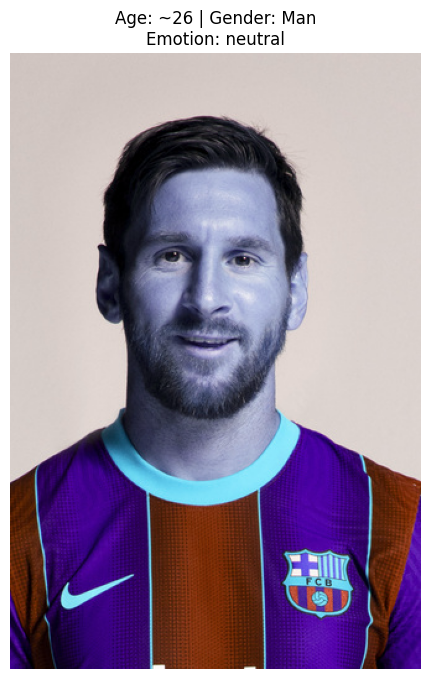

In [36]:
 """Analyze age, gender, and emotion of a face"""
objs = DeepFace.analyze(img1_rgb, actions=['age', 'gender', 'emotion'])
analysis = objs[0]

print("\nAnalysis Results:")
print(f"Age: {analysis['age']}")
print(f"Gender: {analysis['dominant_gender']}")
print(f"Emotion: {analysis['dominant_emotion']}")

# Display image with annotations

plt.figure(figsize=(8, 8))
plt.imshow(img1)
plt.title(f"Age: ~{analysis['age']} | Gender: {analysis['dominant_gender']}\nEmotion: {analysis['dominant_emotion']}")
plt.axis('off')
plt.show()



# Image Identification

In [40]:
img1=cv2.imread('MESSI.jpg')
#img1=cv2.imread('Ronaldo.jpg')

25-10-30 15:49:46 - Found 3 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


25-10-30 15:49:47 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-10-30 15:49:47 - Searching [[[204 193 189]
  [206 195 191]
  [207 196 192]
  ...
  [212 203 199]
  [212 203 199]
  [212 203 199]]

 [[206 195 191]
  [206 195 191]
  [207 196 192]
  ...
  [212 203 199]
  [212 203 199]
  [213 204 200]]

 [[208 197 193]
  [207 196 192]
  [207 196 192]
  ...
  [212 203 199]
  [212 203 199]
  [213 204 200]]

 ...

 [[ 64   2 145]
  [ 65   6 141]
  [ 60   3 136]
  ...
  [ 80  11 162]
  [ 73   4 155]
  [ 70   1 152]]

 [[ 67   0 146]
  [ 55   2 135]
  [ 59   1 136]
  ...
  [ 78  13 159]
  [ 73   8 154]
  [ 71   4 149]]

 [[ 70   2 149]
  [ 55   2 135]
  [ 59   1 136]
  ...
  [ 79  14 160]
  [ 76   8 155]
  [ 72   5 150]]] in 3 length datastore
25-10-30 15:49:47 - find function duration 0.9684312343597412 seconds

Best match: MESSI (Distance: 0.40)


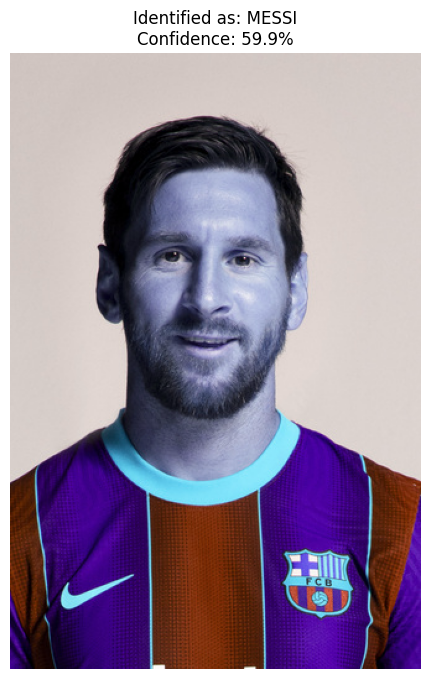

In [41]:
# Image identification
df = DeepFace.find(img_path=img1, db_path="face_db", enforce_detection=False)

if len(df) == 0 or len(df[0]) == 0:
  print("No matches found in database")

best_match = df[0].iloc[0]
identity = os.path.basename(os.path.dirname(best_match['identity']))
distance = best_match['distance']

print(f"\nBest match: {identity} (Distance: {distance:.2f})")

# Display results
plt.figure(figsize=(8, 8))
plt.imshow(img1)
plt.title(f"Identified as: {identity}\nConfidence: {(1-distance)*100:.1f}%")
plt.axis('off')
plt.show()

# Recognize and Annotate

In [49]:
#img1=cv2.imread('MESSI.jpg')
#img1=cv2.imread('Ronaldo.jpg')
img1=cv2.imread('musk.jpg')

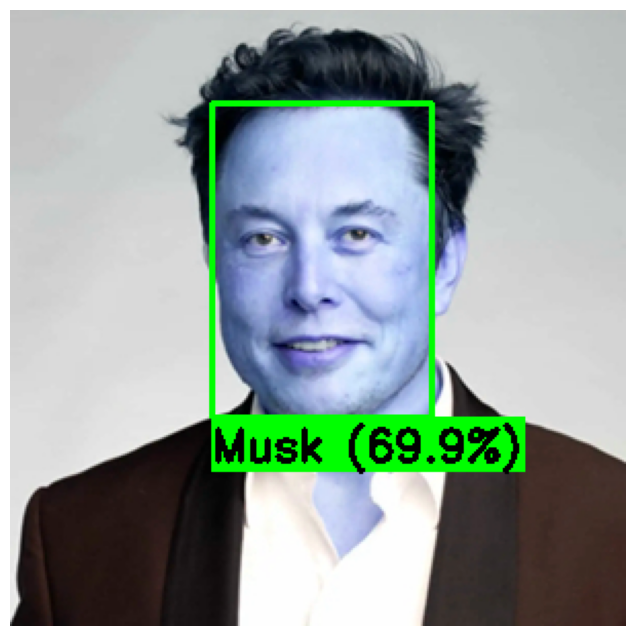

In [50]:
dfs = DeepFace.find(
                img_path=img1,
                db_path="face_db",
                enforce_detection=False,
                detector_backend='retinaface',
                silent=True
            )

if not dfs or len(dfs[0]) == 0:
  print("No matches found in database")

# Still draw detected faces even if not in database
face_objs = DeepFace.extract_faces(img_path=img1,detector_backend='retinaface', enforce_detection=False)
for face_obj in face_objs:
  facial_area = face_obj['facial_area']
  x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
  cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
  cv2.putText(img1, "Unknown", (x, y+h+25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)


# Get all face locations and identities
results = []
for df in dfs:
  if len(df) > 0:
    best_match = df.iloc[0]
    identity = os.path.basename(os.path.dirname(best_match['identity']))
    confidence = (1 - best_match['distance']) * 100
    if face_objs:
      facial_area = face_objs[0]['facial_area']
      results.append({'identity': identity,'confidence': confidence,
                    'x': facial_area['x'],
                    'y': facial_area['y'],
                    'w': facial_area['w'],
                    'h': facial_area['h']
                })

    # Draw rectangles and labels on the image
for result in results:
  x, y, w, h = result['x'], result['y'], result['w'], result['h']
  cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
  label = f"{result['identity']} ({result['confidence']:.1f}%)"

 # Calculate text size to position it properly
  (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)

  # Draw background rectangle for text
  cv2.rectangle(img1,   (x, y + h), (x + text_width, y + h + text_height + 10),  (0, 255, 0), -1)
   # Put text below face rectangle
  cv2.putText(img1, label,   (x, y + h + text_height + 5),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

 # Display the result
plt.figure(figsize=(12, 8))
plt.imshow(img1)
plt.axis('off')
plt.show()
